In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import fftpack
%matplotlib inline

In [3]:
df = pd.read_csv("Return multi country.csv")
df.drop(['Date','Unnamed: 0'],axis=1,inplace=True)
df.head()

,BSE,NYSE,N225,DAX,SS.Shanghai
0,2.879043,-0.068875,0.826596,-0.503077,0.108146
1,0.142811,0.935855,-0.955407,2.248585,1.595793
2,-1.993950,-0.966502,1.772628,-1.577335,-0.537584
3,1.040733,0.824007,-0.186053,1.993045,1.635151
4,0.088865,-3.048505,-0.643715,-3.885590,1.717265


In [4]:
y1 = np.abs(fftpack.fft(df['BSE']))
y2 = np.abs(fftpack.fft(df['NYSE']))
y3 = np.abs(fftpack.fft(df['N225']))
y4 = np.abs(fftpack.fft(df['DAX']))
y5 = np.abs(fftpack.fft(df['SS.Shanghai']))

In [5]:
sampling_rate = 1000
freq = fftpack.fftfreq(len(y1)) * sampling_rate

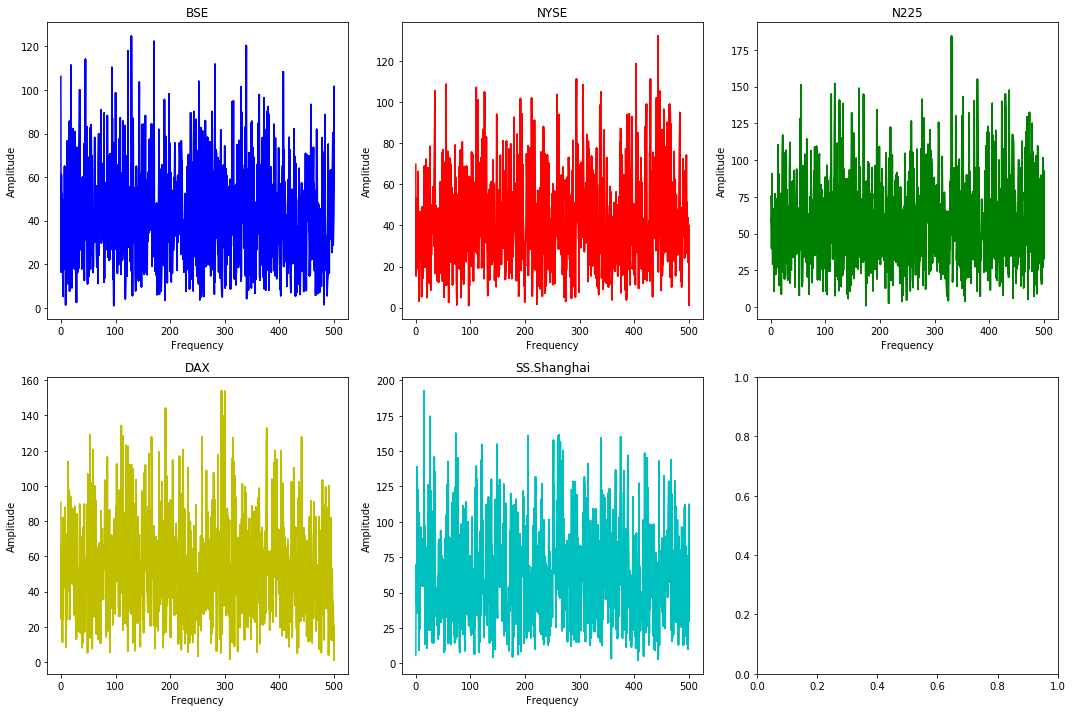

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=3, figsize = (15,10))

col = df.columns
axes[0][0].plot(np.abs(freq),np.abs(y1), 'b')
axes[0][1].plot(np.abs(freq),np.abs(y2), 'r')
axes[0][2].plot(np.abs(freq),np.abs(y3), 'g')
axes[1][0].plot(np.abs(freq),np.abs(y4), 'y')
axes[1][1].plot(np.abs(freq),np.abs(y5), 'c')

p=0
for i in range(0,2):
    for j in range(0,3):
        if(p <5):
            axes[i][j].set_xlabel("Frequency")
            axes[i][j].set_ylabel("Amplitude")
            axes[i][j].set_title(col[p])
        
        p = p+1
        
plt.tight_layout()

In [7]:
from scipy.signal import coherence

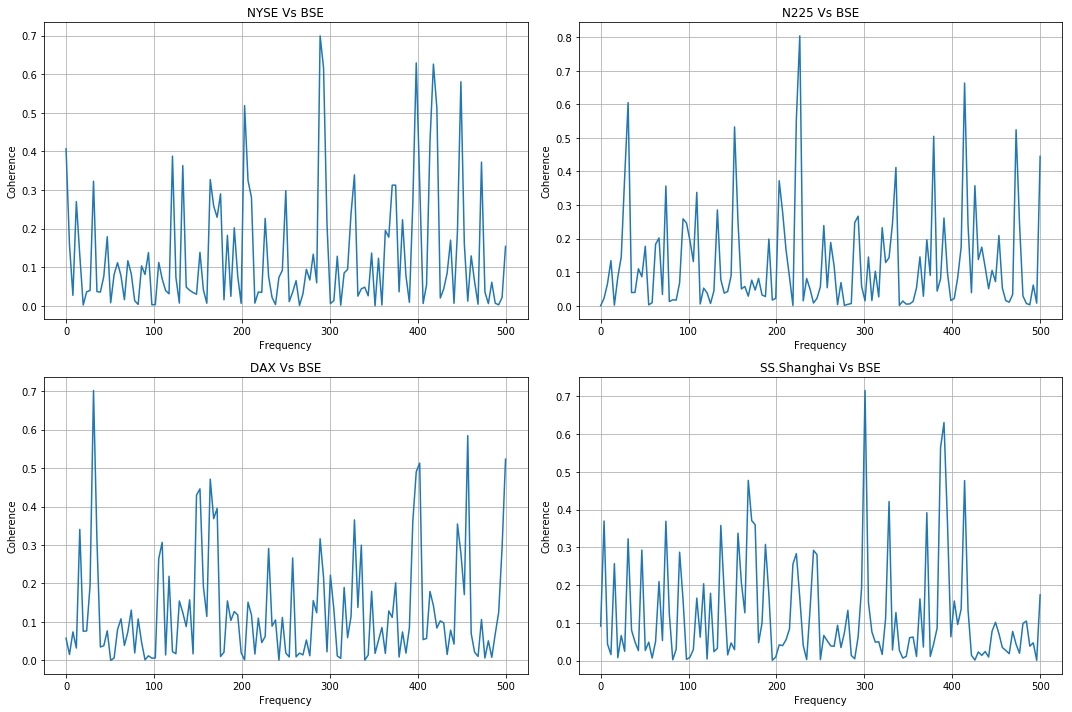

In [8]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

axes[0][0].cohere(y1,y2, detrend = 'linear',Fs = sampling_rate)
axes[0][0].set_title("NYSE Vs BSE")

axes[0][1].cohere(y1,y3, detrend='linear',Fs =sampling_rate)
axes[0][1].set_title("N225 Vs BSE")

axes[1][0].cohere(y1,y4, detrend='linear',Fs =sampling_rate)
axes[1][0].set_title("DAX Vs BSE")

axes[1][1].cohere(y1,y5, detrend='linear',Fs =sampling_rate)
axes[1][1].set_title("SS.Shanghai Vs BSE")

plt.tight_layout()

In [9]:
print(y1)

[106.25983308  16.41636676  61.29393819 ...  34.52085922  61.29393819
  16.41636676]
